<a href="https://colab.research.google.com/github/youngjin1106/project-2/blob/main/project_2_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [ ]:
### Load Dataset 
filename = '/content/Bank Customer Churn Prediction.csv'
df = pd.read_csv(filename)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# change to df.ml from the original data
df_ml = df.copy()

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# df_ml.shape shows 10000rows and 12 columns
df_ml.shape

(10000, 12)

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df_ml.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# Checking duplicates 
df_ml.duplicated().sum()

0

In [ ]:
# dropping unnecessary columns from the data
df_ml.drop(columns = 'customer_id', inplace = True)

In [ ]:
# checking for the missing values
for col in df_ml.select_dtypes(include='object').columns:
  display(df_ml[col].value_counts())
  print('\n')

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

Male      5457
Female    4543
Name: gender, dtype: int64

In [ ]:
# Switch to the name because words is more easily to understand than just number.
df_ml['churn'].replace({1:'Churn', 0:'Not Churn'}, inplace=True)
df_ml['churn'].value_counts()

Not Churn    7963
Churn        2037
Name: churn, dtype: int64

In [ ]:
# Target is "churn"
# define features X and Target Y
target = 'churn'
X = df_ml.drop(columns = target)
y = df_ml[target]

In [ ]:
# Checking outliers
df_ml.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


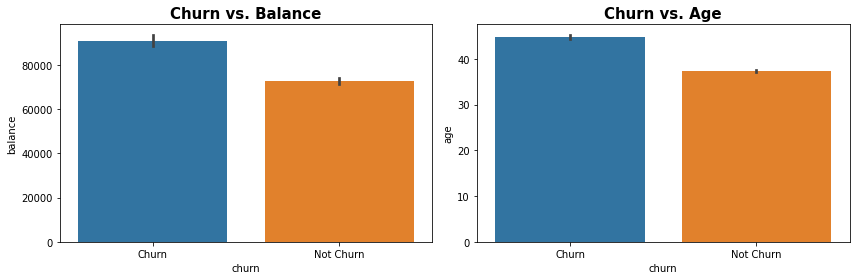

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))

sns.barplot(data=df_ml, x = 'churn', y = 'balance', ax=axes[0])
axes[0].set_title('Churn vs. Balance', fontsize = 15, fontweight = 'bold')

sns.barplot(data=df_ml, x = 'churn', y = 'age', ax=axes[1])
axes[1].set_title('Churn vs. Age', fontsize = 15, fontweight = 'bold')

fig.tight_layout()

The task is to predict whether a bank customer will 'churn' or close their account. I think there has storng correlation between the target and the columns of Balnace and Age.

For the Churn vs Balance plot, it tells that Customer Churn has more average balance than who does not Customer Churn. This might be affected to the bank if they close their accounts. Therefore, the bank need to find a way to hold those Customer Churn. 

For the Churn vs Age plot, it tells that the average age of the Customer Chun is higher than the average age of the Customer Chun. I think some people close the account when they are approxmitely 40. Therefore, the bank need to focus on making new customers.

